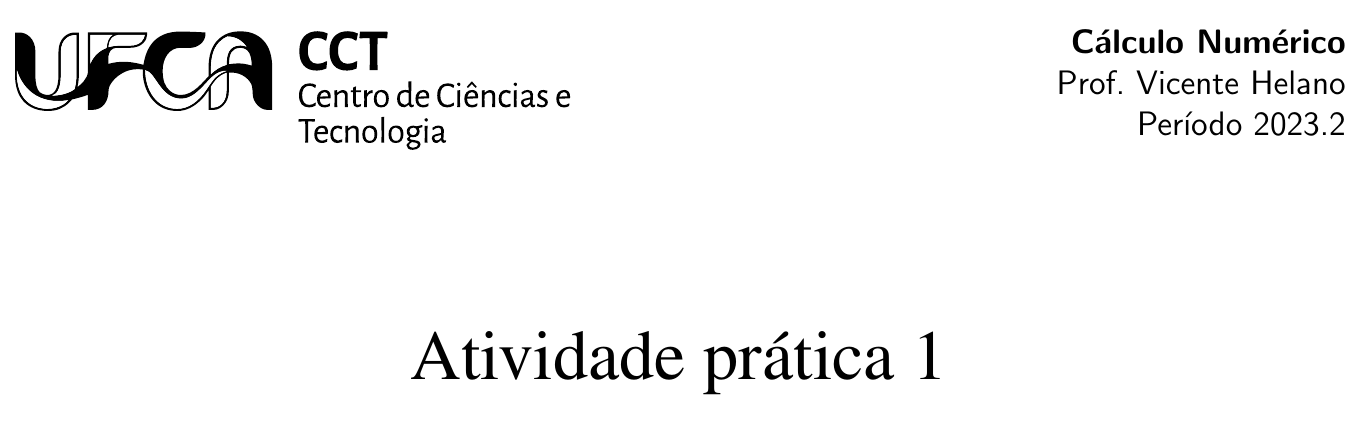

### **Nome:** Wanderson Faustino Patricio

O posicionamento de feixes de laser é uma tarefa chave em técnicas de automáticas de medição óptica. Um método simples para determinar a posição do centro de um feixe se baseia na aplicação do método dos mínimos quadrados em imagens digitais. Nesta atividade, você aprenderá como isto pode ser feito de modo bem simples usando a linguagem Python.

## Imagens digitais

Uma *imagem digital* pode ser vista como uma matriz $\mathbf{P} = \left[ p_{ij} \right]$, $m\times n$, onde cada elemento $p_{ij}$ é denominado *pixel*.
Os cantos superior esquerdo e inferior direito de uma imagem correspondem aos pixels $p_{0,0}$ e $p_{m-1,n-1}$.
Existem diversas formas de se representar a cor de um pixel.
No sistema conhecido como RGB (do inglês, *Red*, *Green*, *Blue*), a cor de um pixel é representada usando três canais: <font color="red">vermelho</font>, <font color="green">verde</font> e <font color="blue">azul</font>.
Supondo cada canal representado com 8 bits, teremos $2^8 = 256$ valores distintos por canal.
A combinação dos três canais possibilita a criação de 256 x 256 x 256 cores, o que é algo em torno de 16 milhões de cores.

Matematicamente, a cor de um pixel $p_{i,j}$ pode ser representada por um vetor de cor $p_{i,j} = \left( r, g, b\right)$, onde $0 \le r,g,b \le 255$.
Quanto maior o valor de um canal, maior será a intensidade dele na cor final obtida.
Algumas exemplos de combinações de canais são:

* $(255,0,0)$: <font color="#ff0000">vermelho</font>
* $(0,255,0)$: <font color="#00ff00">verde</font>
* $(0,0,255)$: <font color="#0000ff">azul</font>
* $(255,255,0)$: <font color="#ffff00">amarelo</font>
* $(0,255,255)$: <font color="#00ffff">ciano</font>
* $(255,0,255)$ <font color="#ff00ff">magenta</font>
* $(0,0,0)$: <font color="#000000">preto</font>
* $(127,127,127)$: <font color="#777777">cinza médio</font>
* $(255,255,255)$: <font color="#ffffff">branco</font> (não dá para ver, não é? Selecione o texto ao lado.)

Em Python, fica fácil manipular imagens usando a biblioteca `imageio`:

In [2]:
import imageio

Este pacote permite carregar imagens armazenadas localmente ou acessíveis pela internet.

Por exemplo, podemos carregar uma imagem a partir de um endereço URL:

In [3]:
laser = imageio.v2.imread('https://drive.google.com/uc?id=1QKtG-29D3Rb85JtRz4iYmqAVr-WavO8i')

o resultado do comando acima é um arranjo 2D semelhante ao `numpy.array`.

Depois de carregar a imagem, podemos exibir suas dimensões (o que chamamos de *resolução espacial*) e a quantidade de canais presentes:

In [9]:
m,n,nc = laser.shape
m,n,nc

(128, 128, 4)

Os números acima significam que a imagem possui 128 pixels de altura, 128 pixels de largura e 4 canais de cores.
Esse quarto canal é conhecido como canal *alfa*, usado para representar níveis de transparência.
Considerando o que precisamos fazer nesta tarefa, este canal pode ser ignorado.

Como a imagem agora é um `array`, podemos acessar um pixel $p_{i,j}$ usando indexação. Por exemplo, o conteúdo do pixel $p_{2,3}$ é

In [19]:
R = laser[2,3,0]
G = laser[2,3,1]
B = laser[2,3,2]
R,G,B

(0, 0, 0)

Para exibir a imagem, podemos usar a `matplotlib`:

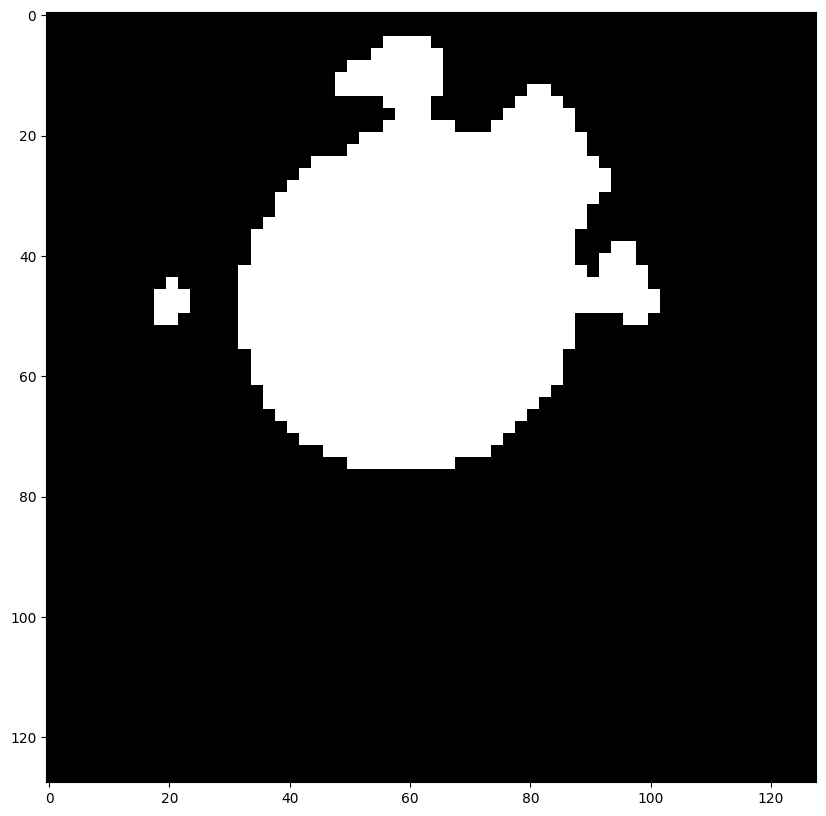

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # ajusta as dimensões de saída
plt.imshow(laser) # cria um gráfico cujo fundo é a imagem
plt.show() # exibe o gráfico criado'

Também é possível abrir imagens armazenadas localmente ou no [Google Drive](https://towardsdatascience.com/the-2-step-guide-to-upload-images-in-google-colab-b51348e882e4).

## Dados de entrada

A ideia básica do método que estudaremos aqui é aproximar o centro do feixe pelo centro do círculo que melhor aproxima a região iluminada pelo laser, segundo o método dos mínimos quadrados. Sendo o feixe representado pela imagem:

d

o conjunto de pontos sobre o qual devemos ajustar o círculo será dado pelas coordenadas dos pixels que possuem a cor branca. Você deve salvar as coordenadas desses pontos na lista abaixo:

In [23]:
# TODO
pontos = []
for x in range(m):
    for y in range(n):
        if laser[y, x, 0] == 255 and laser[y, x, 1] == 255 and laser[y, x, 2] == 255:
            pontos.append((x, y))

## Formulação

Agora, você deve obter as equações que descrevem o problema de se ajustar um círculo de equação:

$$(x - x_c)^2 + (y - y_c)^2 = r^2$$

a um conjunto de pontos $\left\{ (x_i, y_i) \right\}$, $i = 0, 1, \dotsc, m-1$.

## Obtenção do centro do feixe

Agora, você deve implementar o método formulado anteriormente para obter o centro do feixe. Ao final, desenhe os pontos selecionados juntamente com o círculo construído.

In [59]:
# TODO
import numpy as np

size = len(pontos)

A = []
b = []

for i in range(size):
    x, y = pontos[i]
    A.append([2*x, 2*y, 1])
    b.append(x**2 + y**2)

A = np.array(A)
b = np.array(b)

result = np.linalg.lstsq(A, b)[0]
result

<ipython-input-59-8ce0c82d5c36>:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(A, b)[0]


array([   62.08641923,    42.04201112, -5070.60436345])

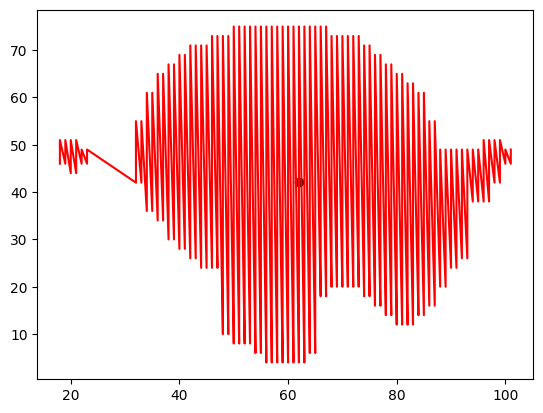

In [61]:
fig, ax = plt.subplots()

x_list = [item[0] for item in pontos]
y_list = [item[1] for item in pontos]

ax.scatter([result[0]], [result[1]], color = 'black', s = 35)
ax.plot(x_list, y_list, color = 'red')
plt.show()

**O resultado final é**:

$$(x_c, y_c) = (62.09, 42.04)$$

In [62]:
print('O resultado final é: (xc, yc)=({:.2f}, {:.2f})'.format(result[0], result[1]))

O resultado final é: (xc, yc)=(62.09, 42.04)


## Saiba mais

* Esta atividade é baseada no artigo: P. Zhou, X. Wang, Q. Huang and C. Ma, "Laser Spot Center Detection Based on Improved Circled Fitting Algorithm," 2018 2nd IEEE Advanced Information Management,Communicates,Electronic and Automation Control Conference (IMCEC), Xi'an, China, 2018, pp. 316-319, doi: 10.1109/IMCEC.2018.8469554.

&copy; 2023 Vicente Helano  
UFCA | Centro de Ciências e Tecnologia